# Linear models

## Dataset

We will work on a standard regression dataset on predicting concrete compressive strength from various composition and processing properties. 

We will download the dataset directly from the [UCI repository](https://archive.ics.uci.edu/ml/datasets/concrete+compressive+strength) using `urllib`. Running it requires an internet connection. Otherwise, you can also download the `Concrete_Data.xls` directly from the link above and place into the root folder relative to this notebook. 

Reading the Excel file requires the `xlrd` library on top of `pandas`. If you see an error due to not having xlrd, install it via
```
$pip install xlrd
```

In general, if you see an error 
```
ModuleNotFoundError: No module named 'some_module'
```
just install it
```
$pip install some_module
```

In [55]:
import pandas as pd
import urllib.request

In [56]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/concrete/compressive/Concrete_Data.xls'
urllib.request.urlretrieve(url, './Concrete_Data.xls')
data = pd.read_excel('./Concrete_Data.xls')

In [57]:
data.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [58]:
len(data.columns)

9

To predict the last column values (Concrete compressive strength) from design variables in the other columns.

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
sns.set()

In [60]:
#get list of variables 
data.columns.tolist()

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

### Visualize data

jointplot to do first pass check on correlation of variable to target, as well as to see distribution of variables and target

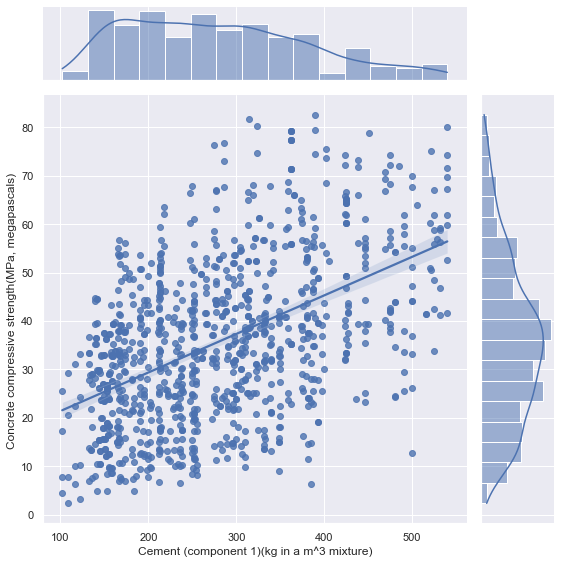

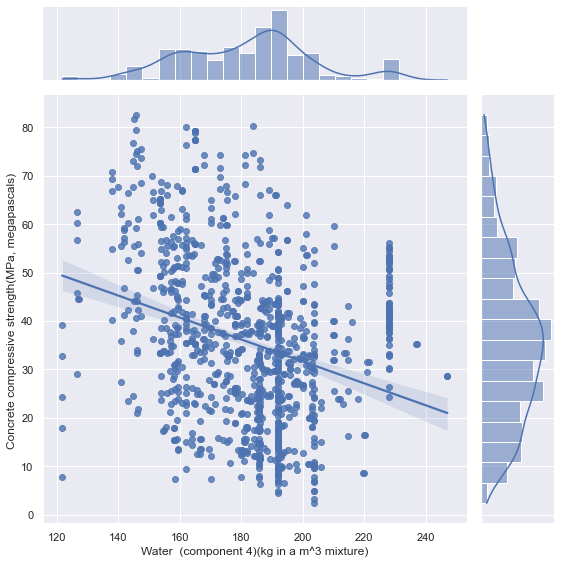

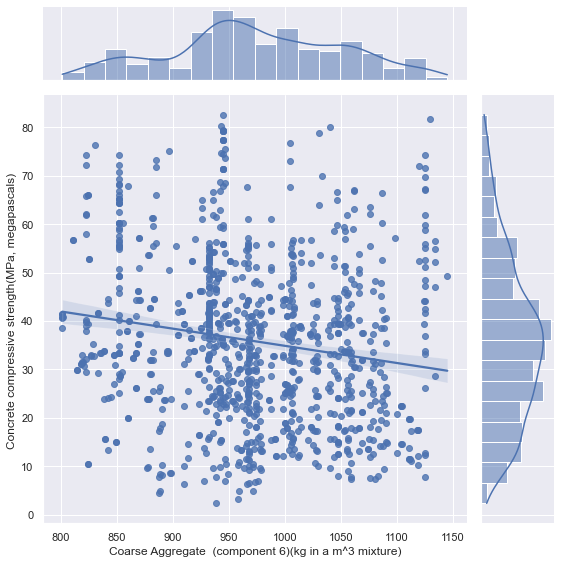

In [61]:
#components = data.columns.tolist()

#choose 3 variables
components = ['Cement (component 1)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)']
y = data['Concrete compressive strength(MPa, megapascals) ']

pearson_coef = []
pearson_pval = []
variable = []
scaler = MinMaxScaler() #normalize

for var in components:
    
    x = data[var]
    
    #plot data for each variable
    sns.jointplot( x=x, y=y, data=data, kind='reg', height = 8);
    plt.show()
    
    #for linear corr, actually no need to normalize as will not affect pearson coef
    #x_norm = scaler.fit_transform(np.array(x).reshape(-1, 1))
    #y_norm = scaler.fit_transform(np.array(y).reshape(-1, 1))
    
    #compile how pearson coef and pvalue
    coef, pval = stats.pearsonr(x, y)
    pearson_coef.append(round(coef,2))
    pearson_pval.append(round(pval,3))
    variable.append(var)
    corr_df = pd.DataFrame(list(zip(variable, pearson_coef, pearson_pval)),
               columns =['Variable', 'Pearson_coef', 'Pearson_pval'])

### Calculate pearson correlation
Pearson correlation to do a first pass check on the strength of the linear relationship between two variables

In [62]:
corr_df 

,Variable,Pearson_coef,Pearson_pval
0,Cement (component 1)(kg in a m^3 mixture),0.50,0.0
1,Water (component 4)(kg in a m^3 mixture),-0.29,0.0
2,Coarse Aggregate (component 6)(kg in a m^3 mi...,-0.16,0.0


Perform linear regression using all the input variables on this dataset to predict the compressive strength. 

### Prepare train test data sets

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
dataset_train, dataset_test = train_test_split(data, test_size=0.2)

In [65]:
len(data), len(dataset_train), len(dataset_test)

(1030, 824, 206)

In [66]:
dataset_train.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
136,389.9,189.0,0.0,145.9,22.0,944.7,755.8,28,74.497882
584,228.0,342.1,0.0,185.7,0.0,955.8,674.3,7,21.917063
941,133.1,210.2,0.0,195.7,3.1,949.4,795.3,28,28.937997
680,102.0,153.0,0.0,192.0,0.0,887.0,942.0,28,17.275511
875,155.0,183.0,0.0,193.0,9.0,1047.0,697.0,28,18.284904


In [67]:
dataset_test.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
118,425.00,106.3,0.00,153.50,16.50,852.1,887.10,28,60.294676
47,380.00,95.0,0.00,228.00,0.00,932.0,594.00,180,40.759063
540,480.00,0.0,0.00,192.00,0.00,936.2,712.20,3,24.404692
128,401.80,94.7,0.00,147.40,11.40,946.8,852.10,28,68.499441
262,212.57,0.0,100.39,159.35,10.37,1003.8,903.79,56,44.395360


### Linear regression

Hypothesis space (8 variables):

$ ℋ={𝑓:𝑓(𝑥)= 𝑤_0+𝑤_1𝑥_1+...+𝑤_8𝑥_8 , 𝑤∈ℝ} $

Loss function:

$ 𝐿(𝑦′,𝑦)=1/2 (𝑦^′−𝑦)^2 $

where  

$ 𝑦′ = 𝑤_0+𝑤_1𝑥_1+...+𝑤_8𝑥_8 $

Solution: 

$ 𝑓 ̂(𝑥)=𝑤 ̂_0+𝑤 ̂_1 𝑥_1+...+𝑤 ̂_8 𝑥_8 $


In [68]:
from sklearn.linear_model import LinearRegression;

In [69]:
data.columns.tolist()

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

In [70]:
target = 'Concrete compressive strength(MPa, megapascals) '

In [71]:
varlist = data.columns.tolist()
varlist.remove(target)
varlist

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)']

In [72]:
x_train = dataset_train[varlist]
x_test = dataset_test[varlist]
y_train = dataset_train[target]
y_test = dataset_test[target]

In [16]:
#scaler = MinMaxScaler() #normalize
#x_train = scaler.fit_transform(x_train)
#x_test = scaler.transform(x_test)
#y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
#y_test = scaler.transform(np.array(y_test).reshape(-1,1))


In [17]:
regressor = LinearRegression()
regressor.fit(
    X=x_train,
    y=y_train,
)
y_hat_train = regressor.predict(x_train)
y_hat_test = regressor.predict(x_test)

### Regression Result - RMSE and MAE metrics chosen

RMSE penalises large errors more than MAE

MAE returns values that are more interpretable as it is simply the average of absolute error

In [28]:
from sklearn import metrics

In [93]:
test_MAE_score = metrics.mean_absolute_error(y_test,y_hat_test)
test_RMSE_score = np.sqrt(metrics.mean_squared_error(y_test,y_hat_test))

In [94]:
#normalized mean_absolute_erorr and root-mean-squared scores
linear_reg_NMAE_score = test_MAE_score/(y_test.max()-y_test.min())
linear_reg_NRMSE_score = test_RMSE_score/(y_test.max()-y_test.min())

In [95]:
#print score of test set
print('normalized MAE : {:.2%} \nnormalized RMSE : {:.2%}'.format(linear_reg_NMAE_score,linear_reg_NRMSE_score) )

normalized MAE : 11.26% 
normalized RMSE : 14.08%


## Question 3 (4 points)

Comparing kernel ridge regression (documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html)) with 3 kernels:
1. linear kernel
2. polynomial kernel with degree 3
3. rbf kernel

In [32]:
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics.pairwise import polynomial_kernel
from sklearn.metrics.pairwise import rbf_kernel

### Kernel ridge regression - linear kernel ===================================================

Regularised least square problem:

min 1/(2N)[‖Φ𝑤 - y‖^2 + 𝜆‖𝑤‖^2] 
 
Solution of ridge regression: 

$𝑤 ̂=(Φ^𝑇 Φ+𝜆𝐼_𝑀 )^-1 Φ^𝑇 𝑦 $


For ridge regression method, we can see that the regularization term 𝜆‖𝑤‖^2 applies the same to all features.

Therefore, data have to be standardized as the penalty factor on the size of coefficients is the same for all features, hence features must be in same scale so that the the penalty factor will not be unfairly affected by any features over others.

Data is standardized after train-test split, as information from test data is not supposed to taken into account in training.

Ridge regression can be reformulated such that solution only depends on the feature maps {𝜙_𝑗} through the dot product 𝜙(𝑥)^𝑇 𝜙(𝑥^′ ) which is the kernel which can be pre defined as long as they are Symmetric Positive Definite

for linear kernel : 
$ 𝑘(𝑥,𝑥^′) = 1+𝑥^𝑇 𝑥′ $

In [33]:
scaler = StandardScaler() #standardization

In [34]:
x_train = dataset_train[varlist]
x_test = dataset_test[varlist]
y_train = dataset_train[target]
y_test = dataset_test[target]

In [35]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test = scaler.transform(np.array(y_test).reshape(-1,1))

In [90]:
krr = KernelRidge(alpha = 1,  kernel='linear')
krr.fit(x_train, y_train)
y_hat_train = krr.predict(x_train)
y_hat_test = krr.predict(x_test)

test_MAE_score = metrics.mean_absolute_error(y_test,y_hat_test)
test_RMSE_score = np.sqrt(metrics.mean_squared_error(y_test,y_hat_test))

#normalized mean_absolute_erorr and root-mean-squared scores
krr_lin_NMAE_score = test_MAE_score/(y_test.max()-y_test.min())
krr_lin_NRMSE_score = test_RMSE_score/(y_test.max()-y_test.min())

#print score of test set
print('normalized MAE : {:.2%} \nnormalized RMSE : {:.2%}'.format(krr_lin_NMAE_score,krr_lin_NRMSE_score) )

normalized MAE : 11.26% 
normalized RMSE : 14.08%


In [96]:
print('improvement over linear regression : {:.2%}'.format(linear_reg_NRMSE_score - krr_lin_NRMSE_score) )

improvement over linear regression : 0.00%


### Kernel ridge regression - polynomial kernel with degree 3 =======================================

for polynomial with 3 degree kernel : 
$ 𝑘(𝑥,𝑥^′) = (1+𝑥^𝑇 𝑥′)^3 $

In [75]:
scaler = StandardScaler() #standardize

In [76]:
x_train = dataset_train[varlist]
x_test = dataset_test[varlist]
y_train = dataset_train[target]
y_test = dataset_test[target]

In [77]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test= scaler.transform(np.array(y_test).reshape(-1,1))

In [78]:
krr = KernelRidge(alpha = 1,  kernel='polynomial', degree = 3)
krr.fit(x_train, y_train)
y_hat_train = krr.predict(x_train)
y_hat_test = krr.predict(x_test)


test_MAE_score = metrics.mean_absolute_error(y_test,y_hat_test)
test_RMSE_score = np.sqrt(metrics.mean_squared_error(y_test,y_hat_test))

#normalized mean_absolute_erorr and root-mean-squared scores
poly3d_NMAE_score = test_MAE_score/(y_test.max()-y_test.min())
poly3d_NRMSE_score = test_RMSE_score/(y_test.max()-y_test.min())

#print score of test set
print('normalized MAE : {:.2%} \nnormalized mean RMSE : {:.2%}'.format(poly3d_NMAE_score,poly3d_NRMSE_score) )


normalized MAE : 6.51% 
normalized mean RMSE : 8.50%


In [79]:
print('improvement over linear regression : {:.2%}'.format(linear_reg_NRMSE_score - poly3d_NRMSE_score) )

improvement over linear regression : 6.90%


### Kernel ridge regression - rbf kernel =======================================================

for RBF kernel, using standardization to ensure data are zero-meaned and in the same scaled becomes very important as the rbf kernel is defined as k(x,y)=exp(-||x-x'||^2/c), each dimension of the feature vector contribute similarly to ||x-x'||^2.

Without standardization, any small degree of variation of features will affect the size of ||x-x'||^2, hence will have huge impact on the results. For example, if a feature is not informative but have huge variation, it will suppress informative feature with low variation

for RBF kernel: 
$ 𝑘(𝑥,𝑥^′ )=exp⁡(−‖𝑥−𝑥^′ ‖^2/(2𝑠^2 )) $ where s > 0

In [80]:
scaler = StandardScaler() #standardize

In [81]:
x_train = dataset_train[varlist]
x_test = dataset_test[varlist]
y_train = dataset_train[target]
y_test = dataset_test[target]

In [82]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
y_test= scaler.transform(np.array(y_test).reshape(-1,1))

In [83]:
krr = KernelRidge(alpha = 1,  kernel='rbf')
krr.fit(x_train, y_train)
y_hat_train = krr.predict(x_train)
y_hat_test = krr.predict(x_test)

test_MAE_score = metrics.mean_absolute_error(y_test,y_hat_test)
test_RMSE_score = np.sqrt(metrics.mean_squared_error(y_test,y_hat_test))

#normalized mean_absolute_erorr and root-mean-squared scores

rbf_NMAE_score = test_MAE_score/(y_test.max()-y_test.min())
rbf_NRMSE_score = test_RMSE_score/(y_test.max()-y_test.min())

#print score of test set
print('normalized MAE : {:.2%} \nnormalized mean RMSE : {:.2%}'.format(rbf_NMAE_score,rbf_NRMSE_score) )

normalized MAE : 7.32% 
normalized mean RMSE : 9.42%


In [84]:
print('improvement over linear regression : {:.2%}'.format(linear_reg_NRMSE_score - rbf_NRMSE_score) )

improvement over linear regression : 5.98%


## Kfold Cross validation for the 4 methods

In [85]:
def geterror(x_train, x_test, y_train, y_test, MAE, RMSE, method):
    
    if method == 'Linear Regressor':
        regressor = LinearRegression()
        regressor.fit(X=x_train,y=y_train)
        y_hat_test = regressor.predict(x_test)
    else:
        #KRR with linear kernel
        krr = KernelRidge(alpha = 1,  kernel=method)
        krr.fit(x_train, y_train)
        y_hat_test = krr.predict(x_test)

    test_MAE_score = metrics.mean_absolute_error(y_test,y_hat_test)
    test_RMSE_score = np.sqrt(metrics.mean_squared_error(y_test,y_hat_test))

    #normalized mean_absolute_error and root-mean-squared scores
    NMAE_score = test_MAE_score/(y_test.max()-y_test.min())
    NRMSE_score = test_RMSE_score/(y_test.max()-y_test.min())
    
    RMSE.append(NRMSE_score)
    MAE.append(NMAE_score)

In [87]:
from sklearn.model_selection import KFold 
kf = KFold(n_splits=5, random_state=1, shuffle=True) 

X = data[varlist]
Y = data[target]
scaler = StandardScaler() #standardization

line_reg_RMSE =[]
line_reg_MAE = []
krr_lin_RMSE =[]
krr_lin_MAE = []
krr_poly_RMSE =[]
krr_poly_MAE = []
krr_rbf_RMSE =[]
krr_rbf_MAE = []


for train_index, test_index in kf.split(data):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    #standardization
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    y_train = scaler.fit_transform(np.array(y_train).reshape(-1,1))
    y_test = scaler.transform(np.array(y_test).reshape(-1,1))
    
    #run model and compile results
    geterror(x_train, x_test, y_train,y_test, krr_lin_MAE, krr_lin_RMSE,  method = 'linear')
    geterror(x_train, x_test, y_train,y_test, krr_poly_MAE, krr_poly_RMSE, method = 'polynomial')
    geterror(x_train, x_test, y_train,y_test, krr_rbf_MAE, krr_rbf_RMSE, method = 'rbf')
    geterror(x_train, x_test, y_train,y_test, line_reg_MAE, line_reg_RMSE, method = 'Linear Regressor')
    
    
#print score of test set
print('{} -  normalized MAE : {:.2%},  normalized RMSE : {:.2%}'.format('krr_linear',sum(krr_lin_MAE)/len(krr_lin_MAE),sum(krr_lin_RMSE)/len(krr_lin_RMSE)))
print('{} -  normalized MAE : {:.2%},  normalized RMSE : {:.2%}'.format('krr_poly',sum(krr_poly_MAE)/len(krr_poly_MAE),sum(krr_poly_RMSE)/len(krr_poly_RMSE)))
print('{} -  normalized MAE : {:.2%},  normalized RMSE : {:.2%}'.format('krr_rbf',sum(krr_rbf_MAE)/len(krr_rbf_MAE),sum(krr_rbf_RMSE)/len(krr_rbf_RMSE)))
print('{} -  normalized MAE : {:.2%},  normalized RMSE : {:.2%}'.format('linear_reg',sum(line_reg_MAE)/len(line_reg_MAE),sum(line_reg_RMSE)/len(line_reg_RMSE)))

krr_linear -  normalized MAE : 10.82%,  normalized RMSE : 13.61%
krr_poly -  normalized MAE : 6.26%,  normalized RMSE : 8.20%
krr_rbf -  normalized MAE : 7.08%,  normalized RMSE : 9.18%
linear_reg -  normalized MAE : 10.81%,  normalized RMSE : 13.61%


### Summary: 
krr_linear perform comparable to linear regression 

krr_poly and krr_rbf perform signifcantly better than linear regression

krr_poly have the best performance

#### Conclusion: Choose Kernel ridge regression with polynomial kernel (deg =3) as it gives the lowest error